# Yucatan Hurricanes Analysis

The following data comes from a LTER study measuring the uses a computer model to quantify impacts of hurricanes across time in the Yucatan Peninsula.

## Citation:
Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).

Data can be accessed [here](https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-hfr.71.23)

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Data Loading and preliminary exploration

In [2]:
df = pd.read_csv("data/hf071-01-hurricanes.csv")

In [3]:
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


# Brainstorm

#### 1. 
First step is to convert start.date and end.date column from objects into datetime. 

#### 2. 
Filter for category 5 hurricanes 

#### 3. 
Create new column with duration which is the result of the subtracting between start and end date. 

#### 4. 
print count of columns 

#### Potential Challenges: 
* Converting end and start date column from object to datetime

# Data Wrangling 

In [4]:
df["start.date"] = pd.to_datetime(df["start.date"]) 

df["end.date"] = pd.to_datetime(df["end.date"]) 


In [5]:
df.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In [6]:
df_5 = df[df["ss"] == 5].copy()

df_5['Duration'] = df["end.date"] - df["start.date"]

In [7]:
df_5.head()

,code,start.date,end.date,number,name,ss,track,rf.max,Duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [8]:
print(df_5["Duration"].count())

4


# Visualize Saffir-Simpson categories across time

In [9]:
df

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1
...,...,...,...,...,...,...,...,...
100,Y1995a,1995-10-01,1995-10-03,15,Opal,1,N*,F0
101,Y1995b,1995-10-10,1995-10-16,17,Roxanne,3,N,F2
102,Y1996,1996-08-20,1996-08-20,4,Dolly,1,N,F1
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


Text(0.5, 0, 'Hurricane Scale')

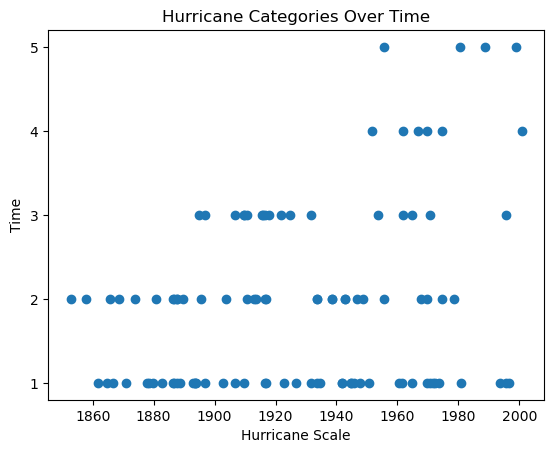

In [28]:
plt.scatter(df["start.date"], df["ss"])
plt.yticks([1,2,3,4,5])
plt.title("Hurricane Categories Over Time")
plt.ylabel("Time")
plt.xlabel("Hurricane Scale")

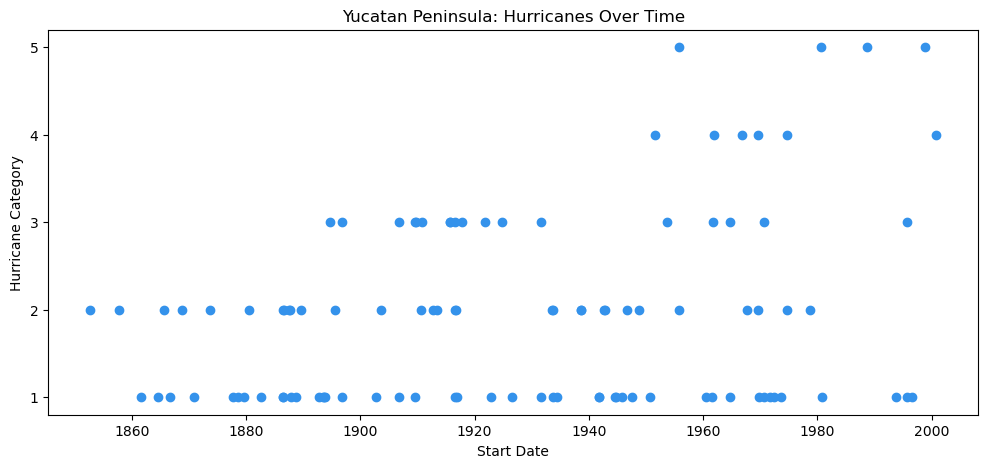

In [31]:
fig, ax = plt.subplots(figsize=(12,5))

plt.scatter(df['start.date'], df['ss'],
           c='#3492eb')
plt.yticks([1,2,3,4,5])
plt.xlabel("Start Date")
plt.ylabel("Hurricane Category")
plt.title("Yucatan Peninsula: Hurricanes Over Time")
plt.show()